Install dependencies

In [1]:
!pip3 install torch torchvision torchaudio
!pip3 install matplotlib
!pip3 install ultralytics roboflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
from ultralytics import YOLO
from pathlib import Path
import os
import json
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:

device = "cuda:0" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device} ({'GPU' if device != 'cpu' else 'CPU'})")


Using device: cuda:0 (GPU)


In [4]:

CONFIG = {
    'model': 'yolo11m.pt',  # Choose model size: n, s, m, l, x
    'data': 'datasets/Hardhat-or-Hat.v1-without-hat.yolov11/data.yaml',  
    'epochs': 35,
    'batch': 2 if device != 'cpu' else 4,  # Adjust batch 
    'imgsz': 640,
    'patience': 5,
    'device': device, 
}
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [5]:

save_dir = Path('runs/detect')
save_dir.mkdir(parents=True, exist_ok=True)

this_path = os.getcwd()

os.environ['ULTRALYTICS_CONFIG_DIR'] = this_path

data_file = f'{this_path}/{CONFIG['data']}'
with open(data_file, 'r') as f:
    data = yaml.safe_load(f)
    

data['train'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/train/images'
data['val'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/valid/images'
data['test'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/test/images'

with open(data_file, 'w') as f:
    yaml.safe_dump(data, f)


In [6]:

model = YOLO(CONFIG['model'])

In [7]:

results = model.train(
    data=CONFIG['data'],
    epochs=CONFIG['epochs'],
    batch=CONFIG['batch'],
    imgsz=CONFIG['imgsz'],
    patience=CONFIG['patience'],
    device=CONFIG['device'],
    
    verbose=True,
    
    optimizer='SGD',
    lr0=0.001,
    lrf=0.01,
    momentum=0.9,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_bias_lr=0.01,
    warmup_momentum=0.8,
    amp=False,
    
    # Augmentations
    augment=True,
    hsv_h=0.015,  # Image HSV-Hue augmentationc
    hsv_s=0.7,   # Image HSV-Saturation augmentation
    hsv_v=0.4,   # Image HSV-Value augmentation
    degrees=10,  # Image rotation (+/- deg)
    translate=0.1,  # Image translation (+/- fraction)
    scale=0.3,   # Image scale (+/- gain)
    shear=0.0,   # Image shear (+/- deg)
    perspective=0.0,  # Image perspective
    flipud=0.1,  # Image flip up-down
    fliplr=0.1,  # Image flip left-right
    mosaic=1.0,  # Image mosaic
    mixup=0.0,   # Image mixup
    
)


New https://pypi.org/project/ultralytics/8.3.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.35 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=datasets/Hardhat-or-Hat.v1-without-hat.yolov11/data.yaml, epochs=35, time=None, patience=5, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=F

train: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/hardhat-or-hat/datasets/Hardhat-or-Hat.v1-without-hat.yolov11/train/labels... 6970 images, 829 backgrounds, 0 corrupt: 100%|██████████| 6970/6970 [00:06<00:00, 1127.50it/s]


train: New cache created: /var/home/larizmen/DATA/REPOS/ai-apps/dev/hardhat-or-hat/datasets/Hardhat-or-Hat.v1-without-hat.yolov11/train/labels.cache


val: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/hardhat-or-hat/datasets/Hardhat-or-Hat.v1-without-hat.yolov11/valid/labels... 1992 images, 242 backgrounds, 0 corrupt: 100%|██████████| 1992/1992 [00:02<00:00, 812.75it/s]


val: New cache created: /var/home/larizmen/DATA/REPOS/ai-apps/dev/hardhat-or-hat/datasets/Hardhat-or-Hat.v1-without-hat.yolov11/valid/labels.cache
Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.48G      1.763      2.007      1.457         50        640: 100%|██████████| 3485/3485 [33:49<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:53<00:00,  4.37it/s]


                   all       1992      15019      0.831      0.771       0.82      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35       2.5G      1.537      1.153      1.256         22        640: 100%|██████████| 3485/3485 [33:29<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15019      0.874      0.807      0.864      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      2.49G      1.492     0.9922      1.205        131        640: 100%|██████████| 3485/3485 [54:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [04:29<00:00,  1.85it/s]

                   all       1992      15019      0.887      0.835      0.891       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      2.48G      1.447     0.9381      1.179          5        640: 100%|██████████| 3485/3485 [1:07:37<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [04:14<00:00,  1.96it/s]

                   all       1992      15019      0.903      0.836      0.892      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      2.48G      1.418     0.9016      1.159          5        640: 100%|██████████| 3485/3485 [1:01:54<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:58<00:00,  4.22it/s]

                   all       1992      15019      0.903       0.84      0.901      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      2.48G      1.398     0.8283       1.14         10        640: 100%|██████████| 3485/3485 [34:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:52<00:00,  4.43it/s]


                   all       1992      15019      0.901      0.861      0.914      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      2.48G      1.378      0.818      1.139         11        640: 100%|██████████| 3485/3485 [36:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [04:12<00:00,  1.97it/s]

                   all       1992      15019      0.915      0.862       0.92      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.48G      1.367     0.8205      1.134          9        640: 100%|██████████| 3485/3485 [42:20<00:00,  1.37it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:51<00:00,  4.46it/s]

                   all       1992      15019      0.917      0.869      0.925      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      2.48G      1.355      0.771      1.121          5        640: 100%|██████████| 3485/3485 [33:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:52<00:00,  4.43it/s]


                   all       1992      15019      0.918      0.872      0.921      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      2.48G      1.335     0.7557      1.116         11        640: 100%|██████████| 3485/3485 [33:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [02:05<00:00,  3.97it/s]

                   all       1992      15019      0.918       0.88      0.925      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.48G      1.338       0.74      1.107          2        640: 100%|██████████| 3485/3485 [42:46<00:00,  1.36it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15019       0.92      0.877      0.931      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      2.48G      1.323     0.7276      1.105          6        640: 100%|██████████| 3485/3485 [33:17<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15019      0.921      0.872      0.928      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.48G      1.317      0.722      1.101          8        640: 100%|██████████| 3485/3485 [33:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15019      0.918      0.878      0.928      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      2.48G      1.308     0.7137      1.097         14        640: 100%|██████████| 3485/3485 [33:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15019      0.924      0.875      0.933      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      2.48G      1.315     0.6957      1.098         37        640: 100%|██████████| 3485/3485 [33:09<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15019      0.923      0.882      0.935      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      2.48G      1.298     0.6859      1.091         12        640: 100%|██████████| 3485/3485 [33:13<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15019       0.92      0.886      0.934      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      2.48G      1.293     0.6825      1.084         22        640: 100%|██████████| 3485/3485 [33:14<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15019      0.918      0.888      0.935      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      2.48G      1.285     0.6839      1.077         22        640: 100%|██████████| 3485/3485 [33:10<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15019      0.924      0.887      0.937      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      2.48G      1.289     0.6677      1.077         16        640: 100%|██████████| 3485/3485 [33:13<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.53it/s]


                   all       1992      15019      0.925      0.893      0.938      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      2.48G      1.274     0.6664      1.082        118        640: 100%|██████████| 3485/3485 [33:17<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.53it/s]


                   all       1992      15019      0.928      0.888      0.941      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      2.48G       1.27     0.6562       1.08         92        640: 100%|██████████| 3485/3485 [33:10<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15019      0.927      0.888      0.937      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      2.48G      1.261     0.6555      1.076         68        640: 100%|██████████| 3485/3485 [33:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15019      0.925      0.892      0.937      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      2.48G      1.258     0.6529      1.072         22        640: 100%|██████████| 3485/3485 [33:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:50<00:00,  4.51it/s]


                   all       1992      15019       0.93      0.891      0.941      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      2.48G       1.25     0.6571      1.071          9        640: 100%|██████████| 3485/3485 [33:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15019      0.928      0.892      0.943      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      2.48G      1.256     0.6312       1.07         37        640: 100%|██████████| 3485/3485 [33:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15019      0.926      0.895      0.944      0.571
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      2.48G      1.198     0.5871      1.052          4        640: 100%|██████████| 3485/3485 [32:59<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15019      0.927       0.89      0.942       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      2.48G       1.18      0.579      1.041         26        640: 100%|██████████| 3485/3485 [32:57<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15019      0.928      0.888      0.943      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35       2.5G      1.181     0.5689      1.039          3        640: 100%|██████████| 3485/3485 [32:58<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15019       0.93      0.894      0.942      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      2.48G       1.17     0.5548      1.029         10        640: 100%|██████████| 3485/3485 [32:53<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.57it/s]


                   all       1992      15019       0.93       0.89      0.943      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35       2.5G      1.168     0.5497      1.025          8        640: 100%|██████████| 3485/3485 [32:55<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15019      0.928      0.887      0.941      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.48G      1.166     0.5404      1.031          3        640: 100%|██████████| 3485/3485 [32:53<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15019      0.928      0.889      0.943      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      2.48G      1.162     0.5463      1.033         15        640: 100%|██████████| 3485/3485 [32:52<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.57it/s]


                   all       1992      15019       0.93       0.89      0.943      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      2.48G      1.151      0.531      1.024         11        640: 100%|██████████| 3485/3485 [32:51<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.57it/s]


                   all       1992      15019      0.931       0.89      0.943      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      2.48G      1.142     0.5378      1.022          9        640: 100%|██████████| 3485/3485 [32:51<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.57it/s]


                   all       1992      15019       0.93      0.892      0.944      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      2.48G       1.13     0.5313      1.014         43        640: 100%|██████████| 3485/3485 [32:55<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.57it/s]


                   all       1992      15019      0.927      0.893      0.943      0.577

35 epochs completed in 22.334 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 40.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.35 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [03:49<00:00,  2.17it/s]


                   all       1992      15019      0.844       0.85      0.902      0.545
                helmet       1202       3942      0.906      0.884       0.94      0.625
             no_helmet        741      11077      0.781      0.817      0.864      0.464
Speed: 0.3ms preprocess, 111.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train4


In [8]:

file_path = f"{str(results.save_dir)}"  
results_csv_path = f"{file_path}/results.csv"  

All expected metrics are present.


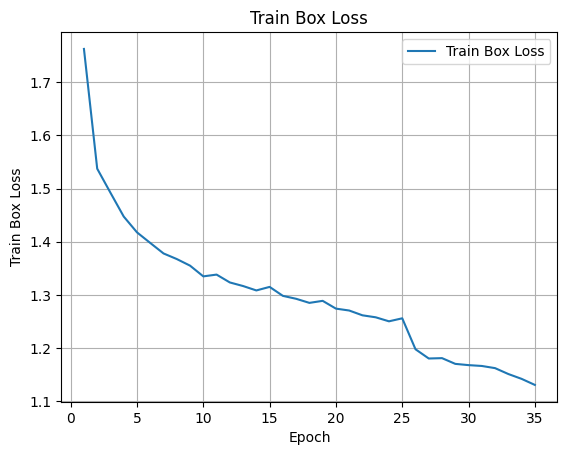

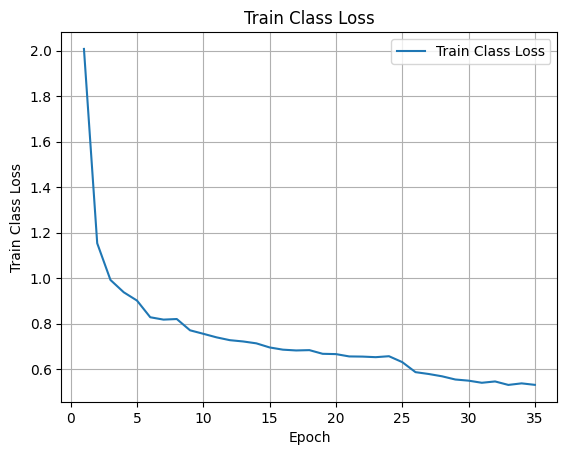

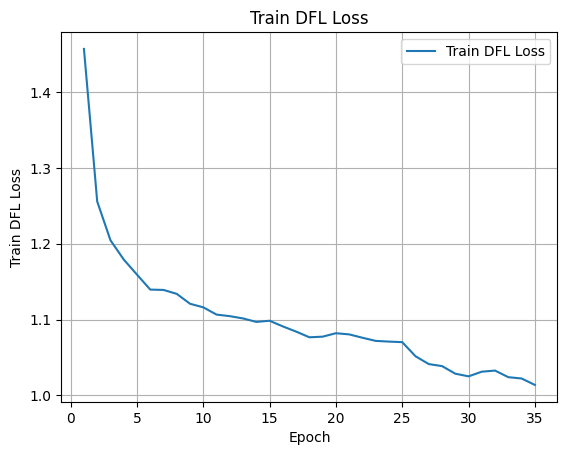

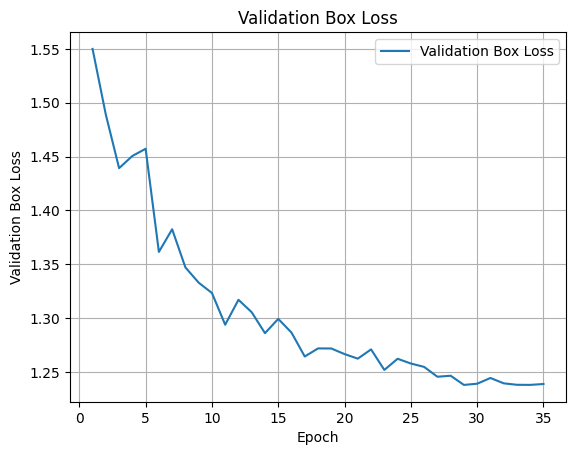

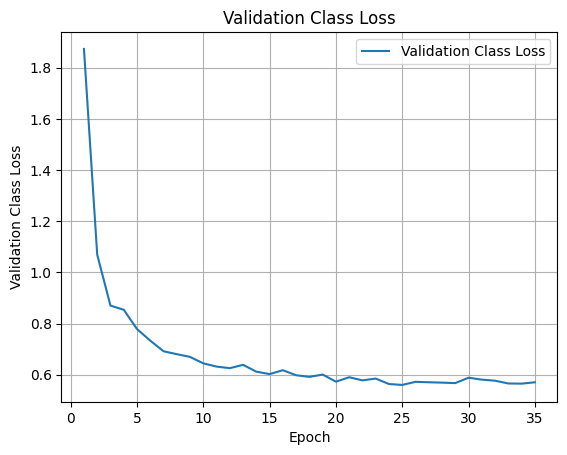

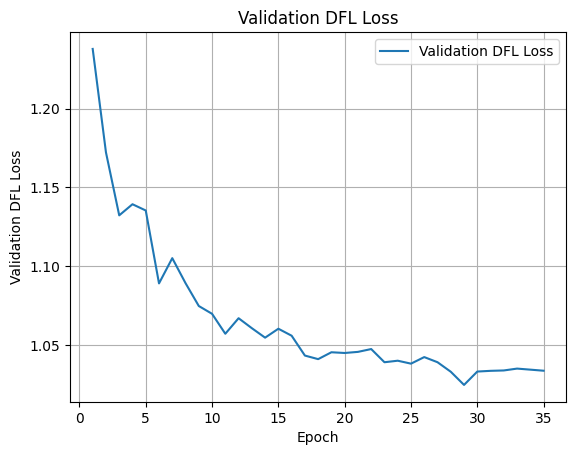

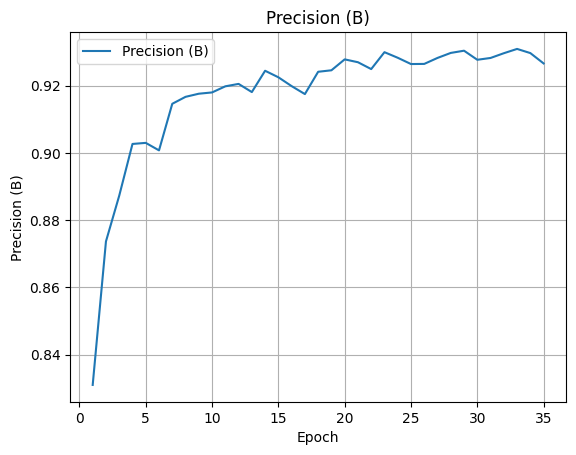

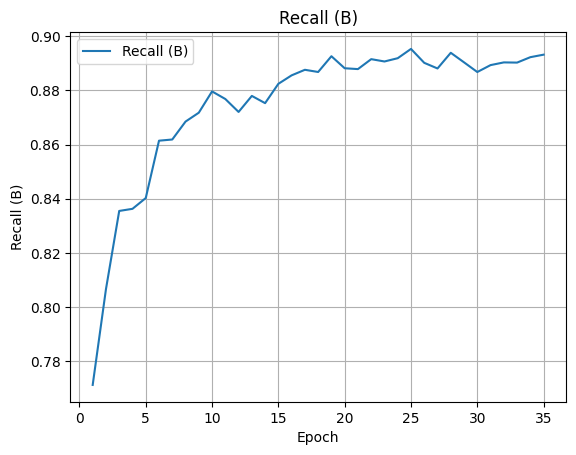

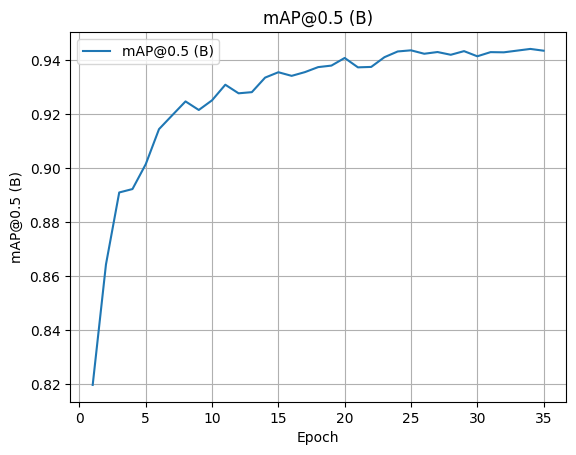

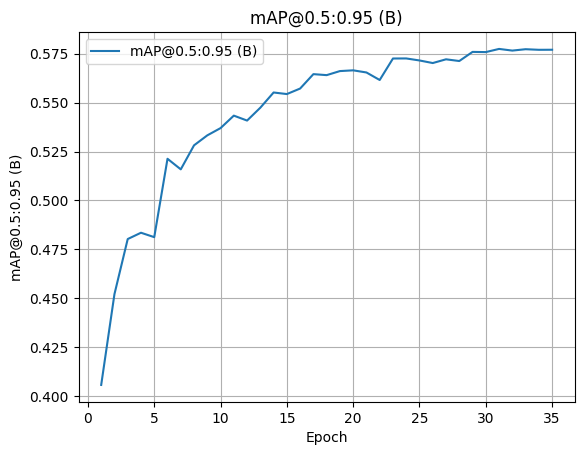


Final Metrics Summary (Last Epoch):
Train Box Loss: 1.1304
Train Class Loss: 0.5313
Train DFL Loss: 1.0138
Validation Box Loss: 1.2388
Validation Class Loss: 0.5707
Validation DFL Loss: 1.0336
Precision (B): 0.9266
Recall (B): 0.8932
mAP@0.5 (B): 0.9434
mAP@0.5:0.95 (B): 0.5769

Improvement Trends:
Train Box Loss: improved (Initial: 1.7629, Final: 1.1304)
Train Class Loss: improved (Initial: 2.0074, Final: 0.5313)
Train DFL Loss: improved (Initial: 1.4570, Final: 1.0138)
Validation Box Loss: improved (Initial: 1.5499, Final: 1.2388)
Validation Class Loss: improved (Initial: 1.8729, Final: 0.5707)
Validation DFL Loss: improved (Initial: 1.2380, Final: 1.0336)
Precision (B): worsened (Initial: 0.8310, Final: 0.9266)
Recall (B): worsened (Initial: 0.7712, Final: 0.8932)
mAP@0.5 (B): worsened (Initial: 0.8196, Final: 0.9434)
mAP@0.5:0.95 (B): worsened (Initial: 0.4059, Final: 0.5769)


In [9]:

try:
    result_metrics = pd.read_csv(results_csv_path)
except FileNotFoundError:
    print(f"File not found: {results_csv_path}")
    exit()


metrics = {
    "Train Box Loss": "train/box_loss",
    "Train Class Loss": "train/cls_loss",
    "Train DFL Loss": "train/dfl_loss",
    "Validation Box Loss": "val/box_loss",
    "Validation Class Loss": "val/cls_loss",
    "Validation DFL Loss": "val/dfl_loss",
    "Precision (B)": "metrics/precision(B)",
    "Recall (B)": "metrics/recall(B)",
    "mAP@0.5 (B)": "metrics/mAP50(B)",
    "mAP@0.5:0.95 (B)": "metrics/mAP50-95(B)",
}

%matplotlib inline

available_metrics = {name: col for name, col in metrics.items() if col in result_metrics.columns}
missing_metrics = [name for name in metrics if name not in available_metrics]

if missing_metrics:
    print(f"Missing metrics: {', '.join(missing_metrics)}")
else:
    print("All expected metrics are present.")

for metric_name, col in available_metrics.items():
    plt.figure()
    plt.plot(result_metrics["epoch"], result_metrics[col], label=metric_name)
    plt.title(metric_name)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

final_epoch = result_metrics.iloc[-1]
final_metrics = {name: final_epoch[col] for name, col in available_metrics.items()}

print("\nFinal Metrics Summary (Last Epoch):")
for name, value in final_metrics.items():
    print(f"{name}: {value:.4f}")

print("\nImprovement Trends:")
for metric_name, col in available_metrics.items():
    initial = result_metrics[col].iloc[0]
    final = result_metrics[col].iloc[-1]
    trend = "improved" if final < initial else "worsened"
    print(f"{metric_name}: {trend} (Initial: {initial:.4f}, Final: {final:.4f})")


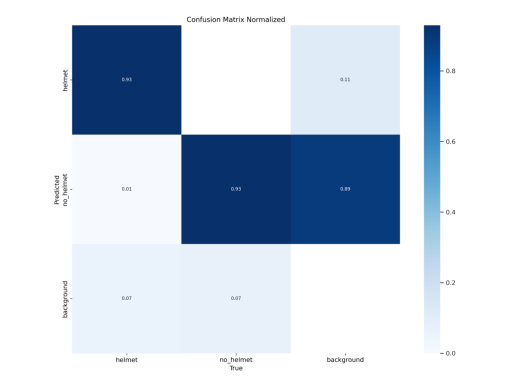

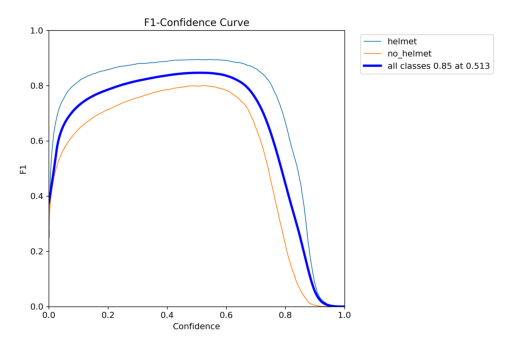

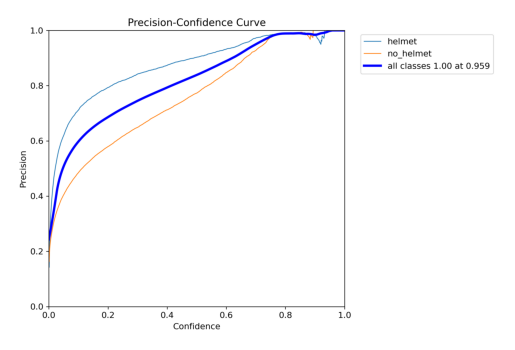

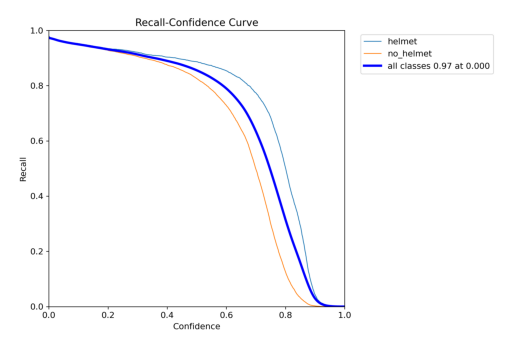

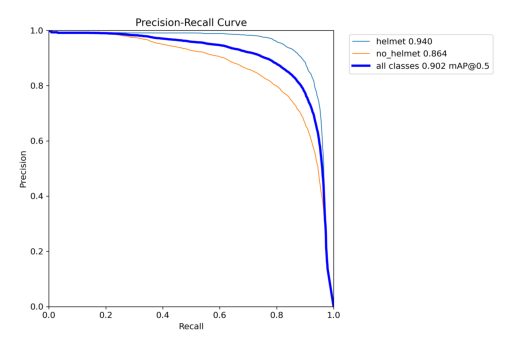

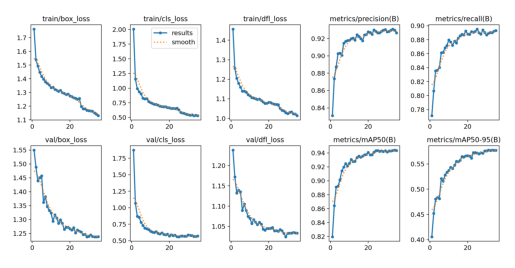

In [10]:


img = mpimg.imread(f"{file_path}/confusion_matrix_normalized.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/F1_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/P_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/R_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/PR_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/results.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

